In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt 
plt.rcParams['figure.figsize'] = [10, 6]
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read raw data 
df = pd.read_csv('dataset_mood_smartphone.csv', index_col=0)
df.head(n=3)

,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
3,AS14.01,2014-02-26 18:00:00.000,mood,6.0


Total number of id in dataset 27


Text(0.5, 1.0, 'No of Measurement per ID')

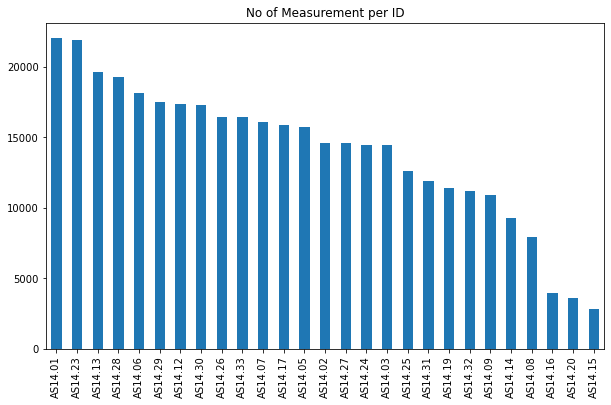

In [3]:
print('Total number of id in dataset {}'.format(len(df.id.value_counts())))
df.id.value_counts().plot(kind='bar')
plt.title('No of Measurement per ID')

Text(0.5, 1.0, 'No of Measurement per Category')

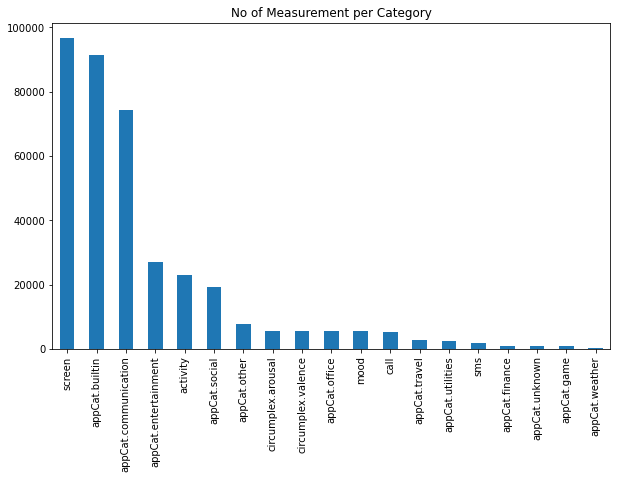

In [4]:
df.variable.value_counts().plot(kind='bar')
plt.title('No of Measurement per Category')

In [5]:
#normalize time ( just keep date part)
df['time'] = pd.to_datetime(df['time'])
df['time'] = df['time'].dt.normalize()

In [6]:
#convert data ( long table to matrix )
#multiindex using 'id' and time 
df2 = df.pivot_table(index=['id', 'time'], columns='variable', values='value')


In [7]:
df2.head(n=3) # lots of missing value 

variable            activity  appCat.builtin  appCat.communication  \
id      time                                                         
AS14.01 2014-02-17       NaN             NaN                   NaN   
        2014-02-18       NaN             NaN                   NaN   
        2014-02-19       NaN             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   
        2014-02-19                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   
        2014-02-19            NaN           NaN            NaN            NaN   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
id      time                                                                 
AS14.01 2014-02-17             NaN               NaN             NaN   1.0   
        2014-02-18             NaN               NaN             NaN   1.0   
        2014-02-19             NaN               NaN             NaN   1.0   

variable            circumplex.arousal  circumplex.valence  mood  screen  sms  
id      time                                                                   
AS14.01 2014-02-17                 NaN                 NaN   NaN     NaN  NaN  
        2014-02-18                 NaN                 NaN   NaN     NaN  NaN  
        2014-02-19                 NaN                 NaN   NaN     NaN  1.0

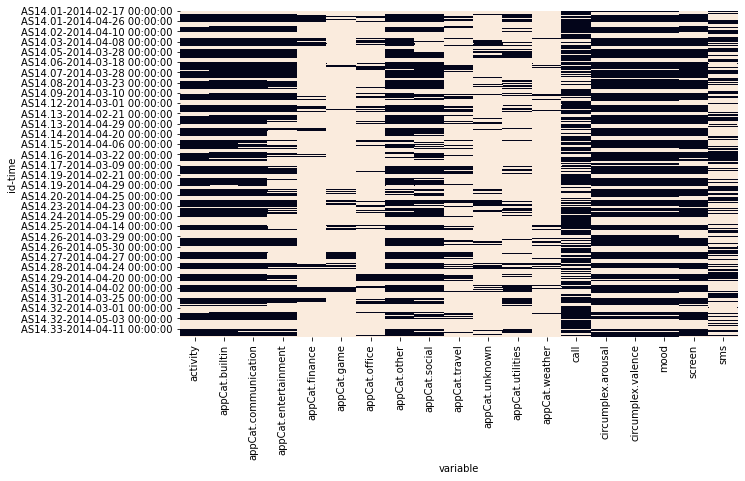

In [8]:
sns.heatmap(df2.isnull(), cbar=False) # visualize  missing value 

Text(0.5, 1.0, 'Missing value % per Variables')

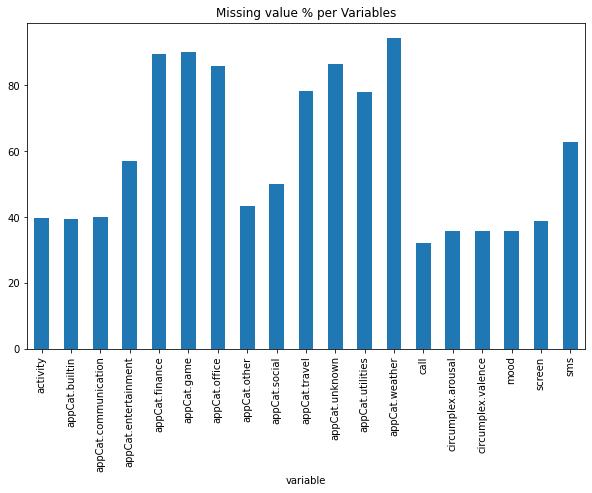

In [9]:
(df2.isna().sum()/df2.shape[0]*100).plot(kind='bar')
plt.title ('Missing value % per Variables')

In [10]:
df2.reset_index(inplace = True)

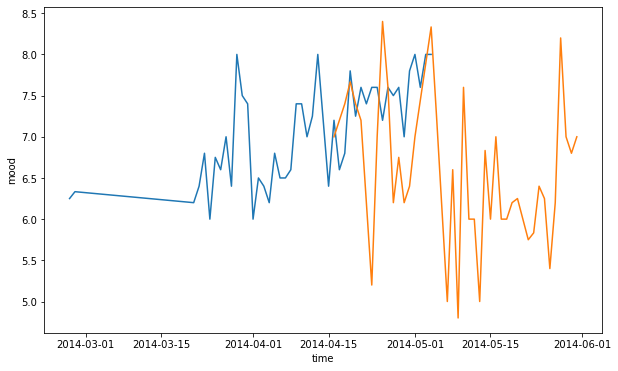

In [11]:
# visualize mood over time for two individuals
sns.lineplot(x= 'time', y = 'mood', data= df2.loc[df2.id=='AS14.01',['time', 'mood']])
sns.lineplot(x= 'time', y = 'mood', data= df2.loc[df2.id=='AS14.33',['time', 'mood']])
                 

Text(0.5, 1.0, ' No of Days data availale per individual ( including Missing value for mood)')

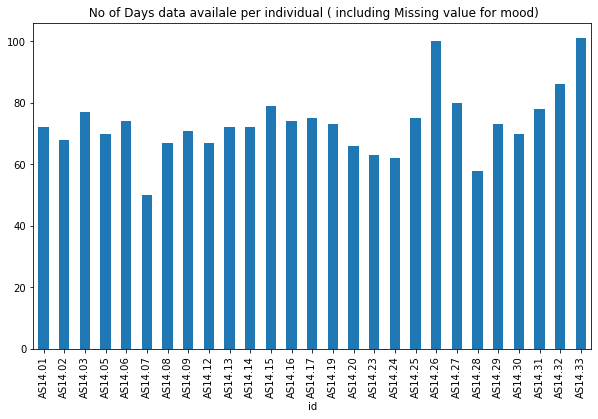

In [12]:
df2.groupby(['id'])['time'].count().plot(kind='bar')
plt.title(' No of Days data availale per individual ( including Missing value for mood)')

Text(0.5, 1.0, ' No of Days data availale per individual (No mood value missing)')

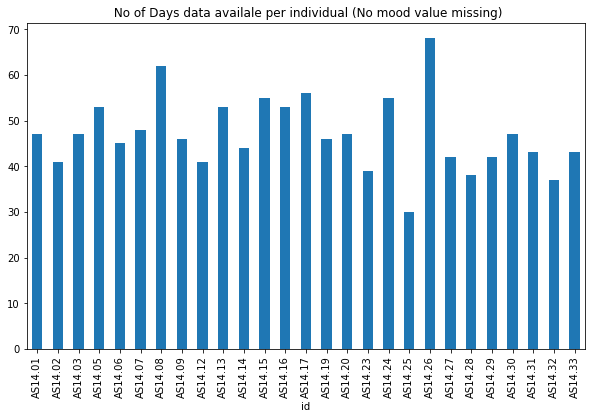

In [13]:
# now remove all rows where mood is missing 
df3 = df2[~df2.mood.isna()]
df3.groupby(['id'])['time'].count().plot(kind='bar')
plt.title(' No of Days data availale per individual (No mood value missing)')

In [14]:
#attribute for which we need mean 
meanattribute = ['mood','activity', 'circumplex.valence', 'circumplex.arousal']
#rest attribute we will use sum 
sumdf = df[~df.variable.isin(meanattribute)]
meandf = df[df.variable.isin(meanattribute)]

In [15]:
sumdf2 = sumdf.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc=np.sum)
meandf2 = meandf.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc=np.mean)

In [16]:
meandf2.head(n=2)

variable            activity  circumplex.arousal  circumplex.valence      mood
id      time                                                                  
AS14.01 2014-02-26       NaN               -0.25            0.750000  6.250000
        2014-02-27       NaN                0.00            0.333333  6.333333

In [17]:
sumdf2.head(n=2)

variable            appCat.builtin  appCat.communication  \
id      time                                               
AS14.01 2014-02-17             NaN                   NaN   
        2014-02-18             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
id      time                                                            
AS14.01 2014-02-17                   NaN             NaN          NaN   
        2014-02-18                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
id      time                                                                    
AS14.01 2014-02-17            NaN           NaN            NaN            NaN   
        2014-02-18            NaN           NaN            NaN            NaN   

variable            appCat.unknown  appCat.utilities  appCat.weather  call  \
id      time                                                                 
AS14.01 2014-02-17             NaN               NaN             NaN   2.0   
        2014-02-18             NaN               NaN             NaN   1.0   

variable            screen  sms  
id      time                     
AS14.01 2014-02-17     NaN  NaN  
        2014-02-18     NaN  NaN

In [18]:
sumdf2.reset_index(inplace=True)
meandf.reset_index(inplace=True)

In [19]:
mergedf = sumdf2.join(meandf2, how='outer', on = ['id', 'time'])

In [20]:
mergedf.head(n=2)

variable,id,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,...,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
mergedf = mergedf.sort_values(['id', 'time'], ascending = True) # lets sort  value of merge df based on id and date 
mergedf = mergedf.reset_index().drop(['index'], axis= 1) # just setting index from 1 to last row 

In [22]:
# add column with previous day, we need to use this for benchmarking
mergedf['prev_day'] = pd.DatetimeIndex(mergedf.time) + pd.DateOffset(-1) 

# filter all rows where the previous row == previous day
filter_df = mergedf['prev_day'] == mergedf['time'].shift(1) 

# add benchmark column with mood from previous day
mergedf.loc[filter_df, "benchmark"] = mergedf['mood'].copy().shift(1) 

In [23]:
# add column with next day, we need to use this for the target
mergedf['next_day'] = pd.DatetimeIndex(mergedf.time) + pd.DateOffset(1) 

# filter all rows where the previous row == previous day
filter_df = mergedf['next_day'] == mergedf['time'].shift(-1) 

# add column with mood of next day
mergedf.loc[filter_df, "mood_next_day"] = mergedf['mood'].copy().shift(-1) 

In [24]:
mergedf.drop(['next_day', 'prev_day'], axis=1, inplace=True)

In [25]:
mergedf.head(n=10)

variable,id,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,...,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood,benchmark,mood_next_day
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,AS14.01,2014-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,AS14.01,2014-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.250000
7,AS14.01,2014-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,2.0,NaN,-0.25,0.750000,6.250000,NaN,6.333333
8,AS14.01,2014-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.333333,6.333333,6.250000,NaN
9,AS14.01,2014-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.333333,NaN


In [26]:
# export data with missing mood (used by arima)
mergedf.to_csv('data/data_arima.csv')

# remove rows for which mood is missing 
mergedf = mergedf[~mergedf.mood.isna()]

In [22]:
# after removing mood missing check how many variables have mood missing 
mergedf.isnull().sum()*100/mergedf.shape[0]

variable
id                       0.000000
time                     0.000000
appCat.builtin           8.753943
appCat.communication     9.542587
appCat.entertainment    35.094637
appCat.finance          83.753943
appCat.game             85.094637
appCat.office           78.706625
appCat.other            13.012618
appCat.social           24.132492
appCat.travel           67.034700
appCat.unknown          79.889590
appCat.utilities        66.561514
appCat.weather          91.246057
call                    41.640379
screen                   7.886435
sms                     66.246057
activity                 9.305994
circumplex.arousal       0.000000
circumplex.valence       0.157729
mood                     0.000000
dtype: float64

In [24]:
mergedf = mergedf.reset_index().drop(['index'], axis= 1) # just setting index from 1 to last row 

In [25]:
mergedf.shape

(1268, 21)

In [26]:
#count missing value percentage per individual for each variable 
missingdf = mergedf.groupby(['id']).apply(lambda x: x.isnull().sum()/len(x)*100)
missingdf.head(n=3)

variable,id,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,...,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood
id,,,,,,,,,,,,,,,,,,,,,
AS14.01,0.0,0.0,4.255319,4.255319,4.255319,31.914894,85.106383,82.978723,4.255319,4.255319,...,89.361702,8.510638,97.872340,31.914894,4.255319,70.212766,4.255319,0.0,0.0,0.0
AS14.02,0.0,0.0,17.073171,19.512195,26.829268,100.000000,100.000000,100.000000,26.829268,21.951220,...,100.000000,90.243902,100.000000,4.878049,14.634146,41.463415,12.195122,0.0,0.0,0.0
AS14.03,0.0,0.0,0.000000,0.000000,0.000000,46.808511,100.000000,42.553191,0.000000,91.489362,...,31.914894,55.319149,95.744681,31.914894,0.000000,59.574468,2.127660,0.0,0.0,0.0


In [94]:
test = missingdf.mean() #>=70 # so we will drop columns where we have > 70 % missing data ( rest we can add)
discard = test[test>70]
discard

variable
appCat.finance    82.829189
appCat.game       82.717038
appCat.office     77.400873
appCat.unknown    79.882491
appCat.weather    90.141521
dtype: float64

In [ ]:
dropcols = ['appCat.finance','appCat.weather', 'appCat.unknown' ]

<AxesSubplot:xlabel='id', ylabel='variable'>

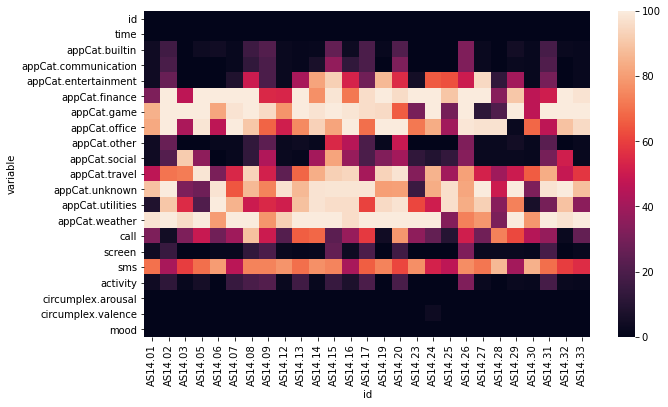

In [27]:
#missing value % visualization per individual 
sns.heatmap(missingdf.T)

C:\Users\priyankas\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


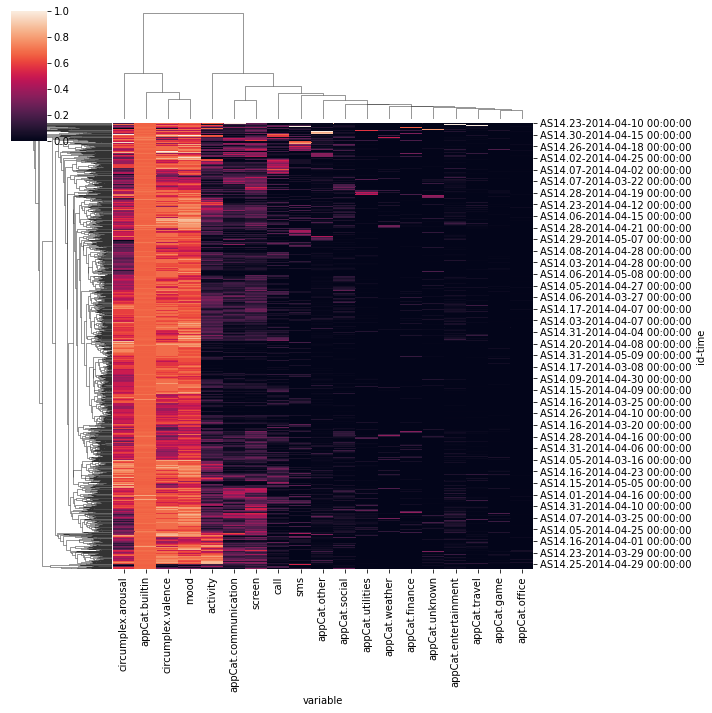

In [28]:
clusterdf = mergedf.set_index(['id', 'time']) # may be we can combine app based on these categories 
sns.clustermap(clusterdf.fillna(0), method='average', metric='euclidean', standard_scale=1)

<AxesSubplot:xlabel='variable', ylabel='variable'>

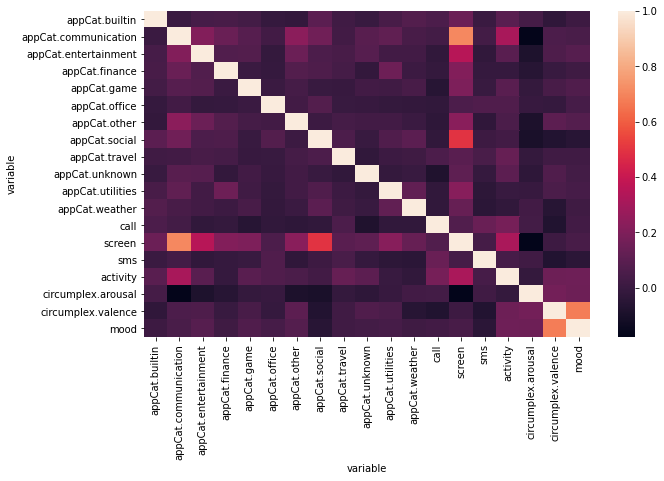

In [29]:
#mergedf.groupby(['id']).agg(['mean','size','count'])
sns.heatmap(mergedf.fillna(0).corr())

<AxesSubplot:xlabel='time', ylabel='mood'>

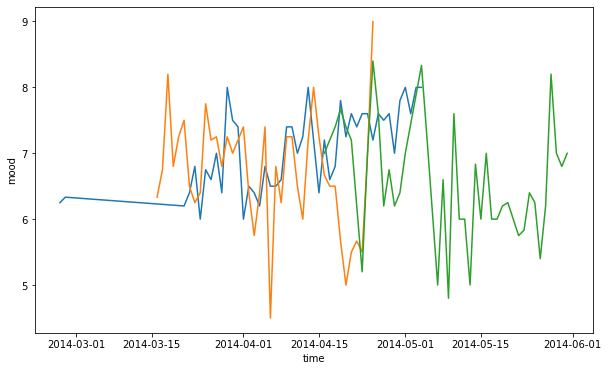

In [30]:
sns.lineplot(x= 'time', y= 'mood', data= mergedf.loc[mergedf.id== 'AS14.01', ['time', 'mood']])
sns.lineplot(x= 'time', y= 'mood', data= mergedf.loc[mergedf.id== 'AS14.02', ['time', 'mood']])
sns.lineplot(x= 'time', y= 'mood', data= mergedf.loc[mergedf.id== 'AS14.33', ['time', 'mood']])

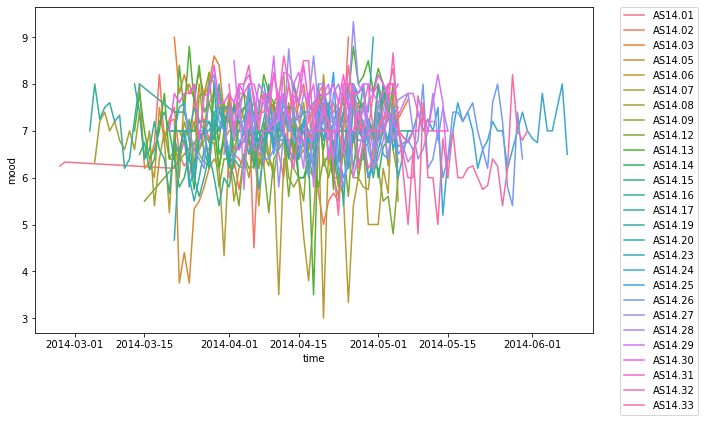

In [33]:
# mood plot really looking crap 
sns.lineplot(x= 'time', y= 'mood', data= mergedf, hue = 'id')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [39]:
mergedf.groupby("id").transform(lambda x: x.fillna(x.mean())).reset_index()

<ipython-input-39-f0b4772b3837>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mergedf.groupby("id").transform(lambda x: x.fillna(x.mean())).reset_index()


variable,index,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,...,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood
0,0,2014-02-26,2082.625956,5832.173578,1166.095622,179.156406,142.401,76.1170,136.570111,1721.079644,...,72.848,262.703907,30.386,1.00000,12088.324244,2.000000,0.092498,-0.250000,0.750000,6.250000
1,1,2014-02-27,2082.625956,5832.173578,1166.095622,179.156406,142.401,76.1170,136.570111,1721.079644,...,72.848,262.703907,30.386,3.15625,12088.324244,1.571429,0.092498,0.000000,0.333333,6.333333
2,2,2014-03-21,3139.218000,6280.890000,1007.456000,49.544000,142.401,172.2060,239.751000,4508.500000,...,72.848,598.754000,30.386,6.00000,17978.907000,1.571429,0.134050,0.200000,0.200000,6.200000
3,3,2014-03-22,731.429000,4962.918000,93.324000,21.076000,142.401,76.1170,98.143000,439.632000,...,72.848,117.621000,30.386,3.00000,6142.161000,1.000000,0.236880,0.600000,0.500000,6.400000
4,4,2014-03-23,1286.246000,5237.319000,94.346000,43.403000,142.401,76.1170,72.823000,900.839000,...,72.848,30.086000,30.386,3.15625,6773.832001,1.571429,0.142741,0.200000,0.800000,6.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,1263,2014-05-27,726.391000,2078.403000,124.694000,3.106000,NaN,244.2195,142.686000,2010.364000,...,8.647,56.173000,NaN,1.00000,4089.879001,2.000000,0.012704,-0.600000,0.400000,6.200000
1264,1264,2014-05-28,2551.046000,1936.415000,614.706000,3.106000,NaN,357.9090,529.946000,5361.211000,...,8.647,30.666000,NaN,10.00000,14320.867998,1.000000,0.103301,0.000000,1.200000,8.200000
1265,1265,2014-05-29,400.034000,435.105000,136.738000,3.106000,NaN,244.2195,29.202000,1789.922000,...,8.647,3.199000,NaN,5.00000,3569.341000,1.000000,0.169354,-1.333333,1.000000,7.000000
1266,1266,2014-05-30,3044.030000,1670.842000,260.220000,3.106000,NaN,244.2195,52.610000,3166.409000,...,8.072,232.825000,NaN,4.00000,9497.646999,1.578947,0.192901,-0.800000,-0.400000,6.800000


In [56]:
mergedf[mergedf.id=='AS14.01'].describe()

variable,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood
count,45.000000,45.000000,45.000000,32.000000,7.00000,8.000000,45.000000,45.000000,25.000000,5.00000,43.000000,1.000,32.000000,45.000000,14.000000,45.000000,47.000000,47.000000,47.000000
mean,2082.625956,5832.173578,1166.095622,179.156406,142.40100,76.117000,136.570111,1721.079644,248.411520,72.84800,262.703907,30.386,3.156250,12088.324244,1.571429,0.092498,-0.243262,0.700709,7.062411
std,2602.630805,3060.792651,1197.067934,300.251716,125.90323,70.654553,171.313320,1461.115619,398.914174,93.52652,207.806856,NaN,2.411122,5216.462622,1.089410,0.044607,0.495726,0.292849,0.603997
min,302.446000,866.833000,68.206000,10.606000,1.05900,3.010000,31.482000,27.470000,5.031000,3.14800,11.083000,30.386,1.000000,2005.750999,1.000000,0.014021,-1.250000,0.000000,6.000000
25%,866.956000,3381.689000,426.734000,33.896000,40.13000,21.673000,47.789000,439.632000,41.982000,29.29000,118.288500,30.386,1.000000,8186.036001,1.000000,0.068203,-0.500000,0.550000,6.500000
50%,1286.246000,5341.657000,940.770000,50.937500,114.40600,59.289500,79.033000,1422.548000,63.874000,30.10200,214.648000,30.386,2.000000,12522.474999,1.000000,0.090112,-0.250000,0.750000,7.200000
75%,1957.829000,7355.015000,1545.227000,141.856500,233.88850,112.342500,170.348000,2655.121000,187.945000,66.47700,350.183000,30.386,4.000000,15482.018999,1.750000,0.116110,0.200000,1.000000,7.600000
max,15159.190000,14438.082000,6265.556000,1321.104000,333.30500,182.451000,1056.684000,5040.067000,1614.621000,235.22300,986.014000,30.386,10.000000,22086.478000,4.000000,0.236880,0.800000,1.000000,8.000000


C:\Users\priyankas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='appCat.builtin', ylabel='Density'>

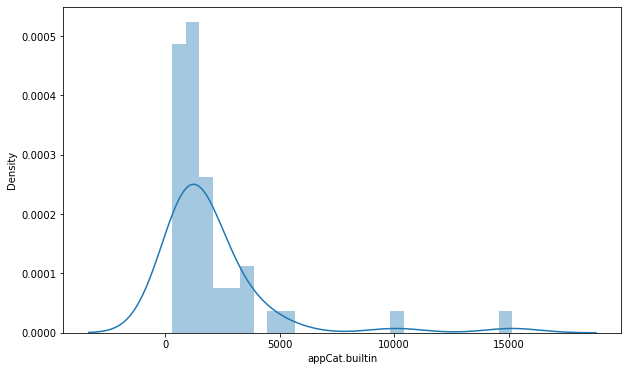

In [58]:
sns.distplot(mergedf[mergedf.id=='AS14.01']['appCat.builtin']) # may be we replace things by median instead of mean 

In [63]:
# replace with median as you can see values are very far off 
imputdf = mergedf.fillna(mergedf.groupby('id').transform('median'))

In [64]:
imputdf.head(n=4)

variable,id,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,...,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood
0,AS14.01,2014-02-26,1286.246,5341.657,940.77,50.9375,114.406,59.2895,79.033,1422.548,...,30.102,214.648,30.386,1.0,12522.474999,2.0,0.090112,-0.25,0.75,6.25
1,AS14.01,2014-02-27,1286.246,5341.657,940.77,50.9375,114.406,59.2895,79.033,1422.548,...,30.102,214.648,30.386,2.0,12522.474999,1.0,0.090112,0.0,0.333333,6.333333
2,AS14.01,2014-03-21,3139.218,6280.89,1007.456,49.544,114.406,172.206,239.751,4508.5,...,30.102,598.754,30.386,6.0,17978.907,1.0,0.13405,0.2,0.2,6.2
3,AS14.01,2014-03-22,731.429,4962.918,93.324,21.076,114.406,59.2895,98.143,439.632,...,30.102,117.621,30.386,3.0,6142.161,1.0,0.23688,0.6,0.5,6.4


In [82]:
#add additional time features to imputed data 
imputdf[['Month']] = imputdf['time'].dt.month_name()
imputdf[['Day_name']] = imputdf['time'].dt.day_name()
imputdf[['is_weekend']] = np.where(imputdf['Day_name'].isin(['Sunday','Saturday']),1,0)


In [84]:
imputdf.head(n=3)

variable,id,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,...,call,screen,sms,activity,circumplex.arousal,circumplex.valence,mood,Month,Day_name,is_weekend
0,AS14.01,2014-02-26,1286.246,5341.657,940.77,50.9375,114.406,59.2895,79.033,1422.548,...,1.0,12522.474999,2.0,0.090112,-0.25,0.75,6.25,February,Wednesday,0
1,AS14.01,2014-02-27,1286.246,5341.657,940.77,50.9375,114.406,59.2895,79.033,1422.548,...,2.0,12522.474999,1.0,0.090112,0.0,0.333333,6.333333,February,Thursday,0
2,AS14.01,2014-03-21,3139.218,6280.89,1007.456,49.544,114.406,172.206,239.751,4508.5,...,6.0,17978.907,1.0,0.13405,0.2,0.2,6.2,March,Friday,0


In [87]:
# On hot encoding 
Month = pd.get_dummies(imputdf['Month'])
Dayname = pd.get_dummies(imputdf['Day_name'])
# add these features to main data frame ( extended data frame contains a lot of values)
imputextend = pd.concat([imputdf, Month, Dayname], axis=1)



In [105]:
# Now based on missingness we can drop columns  ( > 70 % missing) we calculated previously 
discard 

variable
appCat.finance    82.829189
appCat.game       82.717038
appCat.office     77.400873
appCat.unknown    79.882491
appCat.weather    90.141521
dtype: float64

In [106]:
# We can also discard columns Month and Day_name as we have them one hot ecoded 
imputextend = imputextend.drop(discard.index, axis=1).drop(['Month', 'Day_name'], axis=1)

In [107]:
imputextend # Can we use this as our matrix to build model ? May be I will try 

,id,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,appCat.travel,appCat.utilities,call,...,June,March,May,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,AS14.01,2014-02-26,1286.246,5341.657,940.77,79.033,1422.548,63.874,214.648,1.0,...,0,0,0,0,0,0,0,0,0,1
1,AS14.01,2014-02-27,1286.246,5341.657,940.77,79.033,1422.548,63.874,214.648,2.0,...,0,0,0,0,0,0,0,1,0,0
2,AS14.01,2014-03-21,3139.218,6280.89,1007.456,239.751,4508.5,915.445,598.754,6.0,...,0,1,0,1,0,0,0,0,0,0
3,AS14.01,2014-03-22,731.429,4962.918,93.324,98.143,439.632,37.305,117.621,3.0,...,0,1,0,0,0,1,0,0,0,0
4,AS14.01,2014-03-23,1286.246,5237.319,94.346,72.823,900.839,63.874,30.086,2.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,AS14.33,2014-05-27,726.391,2078.403,124.694,142.686,2010.364,51.574,56.173,1.0,...,0,0,1,0,0,0,0,0,1,0
1264,AS14.33,2014-05-28,2551.046,1936.415,614.706,529.946,5361.211,51.574,30.666,10.0,...,0,0,1,0,0,0,0,0,0,1
1265,AS14.33,2014-05-29,400.034,435.105,136.738,29.202,1789.922,0.939,3.199,5.0,...,0,0,1,0,0,0,0,1,0,0
1266,AS14.33,2014-05-30,3044.03,1670.842,260.22,52.61,3166.409,1052.648,232.825,4.0,...,0,0,1,1,0,0,0,0,0,0
